# Implementation of Naive Bayes Algorithm on Iris Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

In [6]:
i = load_iris()
i.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(i['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
df = pd.DataFrame(i.data,columns=i.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [17]:
i.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [19]:
i.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
np.unique(i.target)

array([0, 1, 2])

In [21]:
len(i.target)

150

In [22]:
df['output'] = i.target
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


# Split Data into Training and Testing

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X =df.drop(columns='output')
X[:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [25]:
y = df.output
y[:2]

0    0
1    0
Name: output, dtype: int64

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8)

In [27]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
bnb.score(X_train,y_train)*100

36.666666666666664

In [30]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb.score(X_train,y_train)*100


85.83333333333333

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)*100

95.0

# From above results we are going to continue with GaussianNB as it is having highest score

In [32]:
y_pred = gnb.predict(X_test)
y_pred[:5]

array([0, 0, 0, 2, 2])

In [33]:
y_test[:5]

44     0
39     0
40     0
147    2
114    2
Name: output, dtype: int64

# Performance Metrics

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 10]])

Text(70.72222222222221, 0.5, 'Actual')

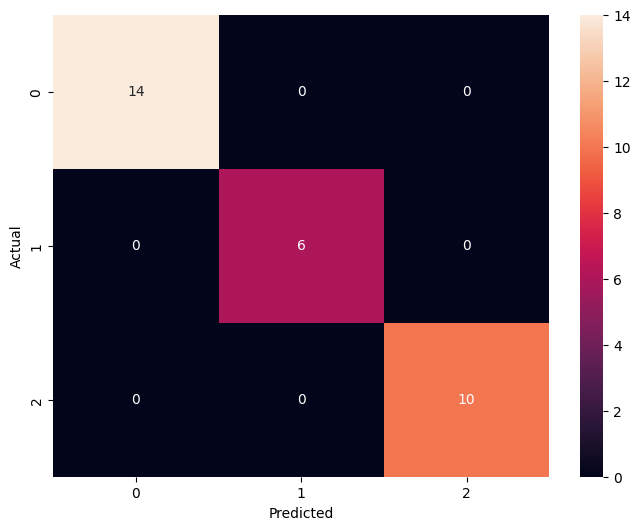

In [39]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [40]:
# Columnwise predicted data
sum(y_pred==2)

10

In [41]:
# Rowwise actual data
sum(y_test==2)

10

In [42]:
# Classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

